# EDA on Python
## Data Import
For basic data profile, please check out [Profile Report]('ProfileReport_mini.html')

In [1]:
import pandas as pd
import altair as alt
from altair_saver import save
alt.data_transformers.disable_max_rows();
alt.data_transformers.enable('data_server');
alt.renderers.enable('mimetype');
alt.renderers.enable('altair_saver', fmts=['vega-lite', 'svg']);

In [2]:
train_df = pd.read_csv('data/widsdatathon2022/train.csv')
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## EDA
### Facility type
- Commercial buildings has higher Energy Use Intensity (EUI) than residential building in general.

In [3]:
train_df.groupby(['facility_type', 'building_class']).mean()['site_eui'].sort_values(ascending = False).head(10)

facility_type                         building_class
Data_Center                           Commercial        339.734876
Laboratory                            Commercial        329.448470
Health_Care_Inpatient                 Commercial        248.340597
Grocery_store_or_food_market          Commercial        241.135162
Food_Service_Restaurant_or_cafeteria  Commercial        195.593925
Health_Care_Outpatient_Uncategorized  Commercial        189.892345
Health_Care_Uncategorized             Commercial        183.945201
Public_Safety_Penitentiary            Commercial        170.904892
Public_Assembly_Stadium               Commercial        157.041663
Service_Vehicle_service_repair_shop   Commercial        137.595749
Name: site_eui, dtype: float64

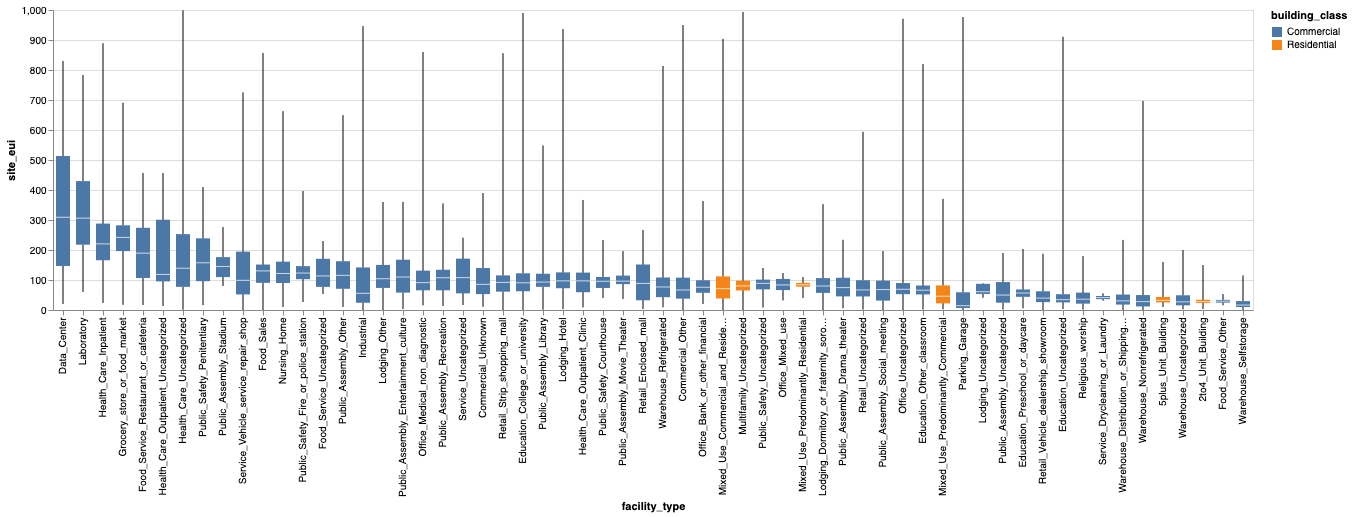

In [4]:
sorted_mean = train_df.groupby('facility_type').mean('site_eui').sort_values('site_eui', ascending = False).index
alt.Chart(train_df).mark_boxplot(extent="min-max").encode(
    x=alt.X(
        "facility_type",
        sort=list(sorted_mean)
    ),
    y="site_eui:Q",
    color="building_class",
)

### Energy star rating 
- Energy star rating is highly correlated to EUI

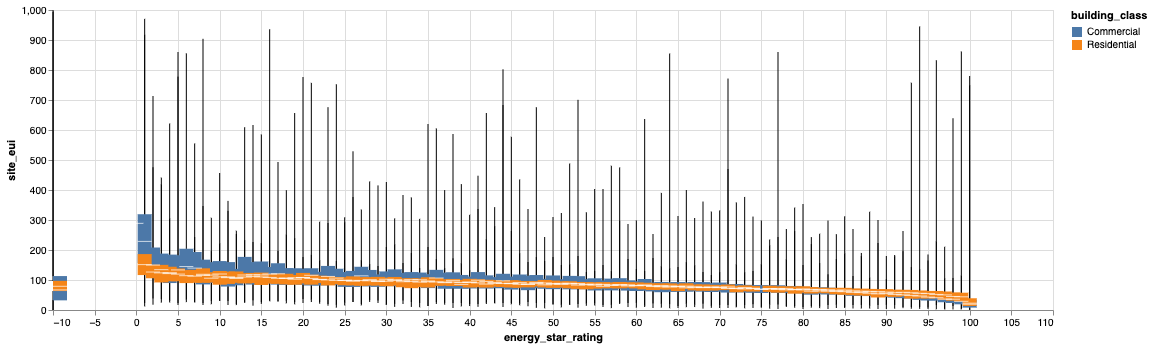

In [5]:
alt.Chart(train_df).mark_boxplot(extent="min-max").encode(
    x=alt.X(
        "energy_star_rating",
    ),
    y="site_eui:Q",
    color="building_class",
).properties(width=1000)

### Elevation
- Elevation does not correlate much with EUI.
- How can we make use of this data?

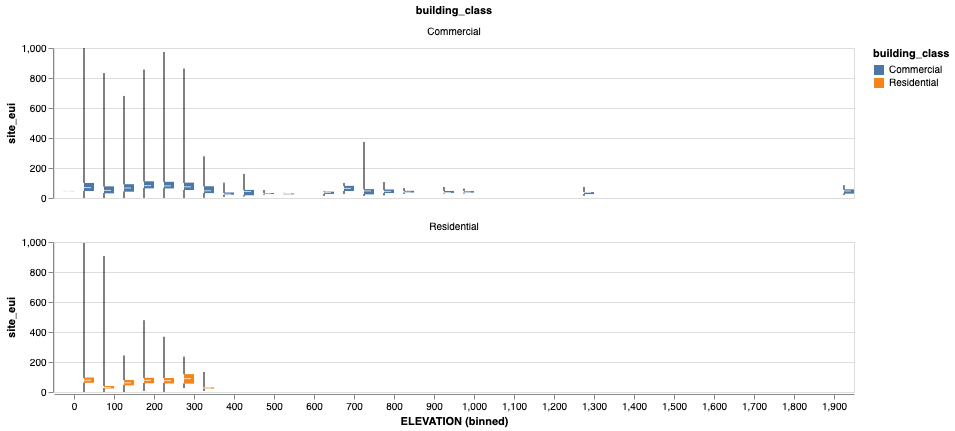

In [6]:
## Do a Binning
alt.Chart(train_df).mark_boxplot(extent="min-max").encode(
    x=alt.X(
        "ELEVATION",
         bin=alt.Bin(maxbins=50)
    ),
    y="site_eui:Q",
    color="building_class",
    tooltip=["count()"],
    facet=alt.Facet('building_class:N', columns=1),
).properties(height= 150, width=800)

### Built year
- Residential buildings are less vary than Commercial Building.
- New residential buildings built after 2000 has obvious EUI drop

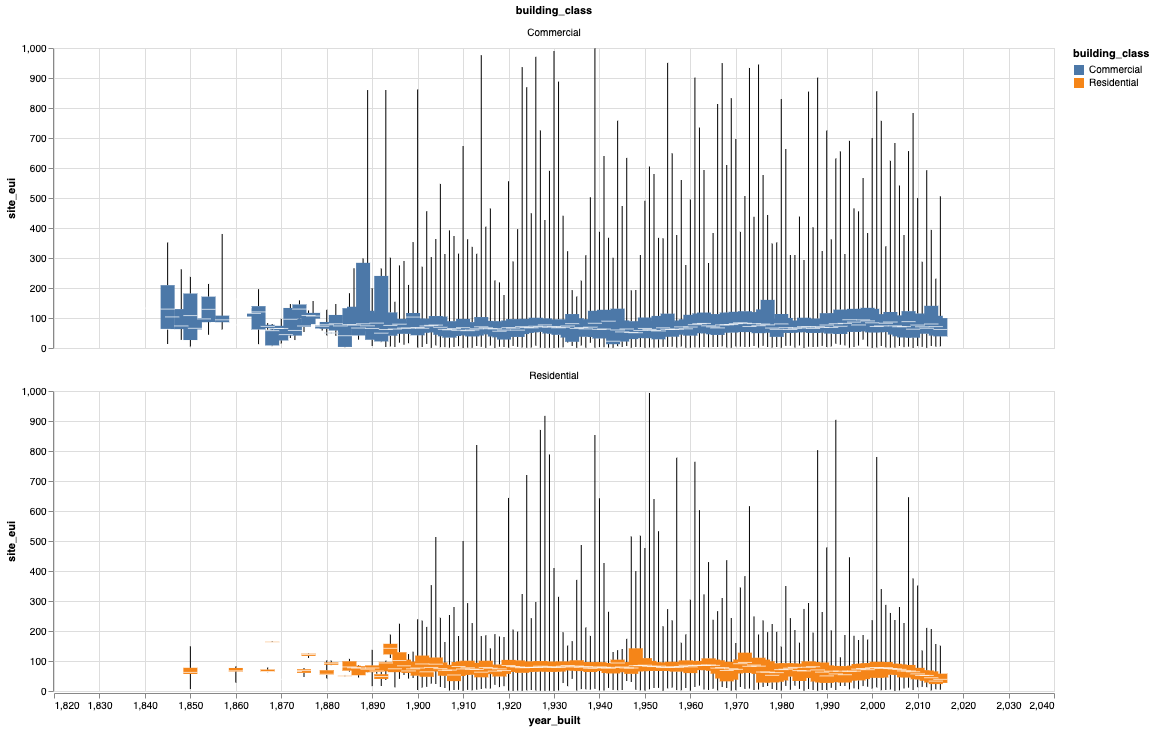

In [7]:
## Do facat

alt.Chart(train_df.query('year_built >= 1840')).mark_boxplot(extent="min-max").encode(
    x=alt.X(
        "year_built",
        scale=alt.Scale(domain=[1840, 2020])
    ),
    y="site_eui:Q",
    color="building_class:N",
    facet=alt.Facet('building_class:N', columns=1)
).properties(width=1000)#.configure_mark(
  #  opacity=0.8,
#)